Author: Jase Banta \
Data: 2024-12-07 \
Description: Sample python code written for UChicago M.S. Applied Data Science Program.

               age     duration
count  6178.000000  6178.000000
mean     40.002266   258.878601
std      10.507797   260.536947
min      18.000000     0.000000
25%      32.000000   102.000000
50%      38.000000   178.000000
75%      47.000000   319.000000
max      94.000000  3366.000000


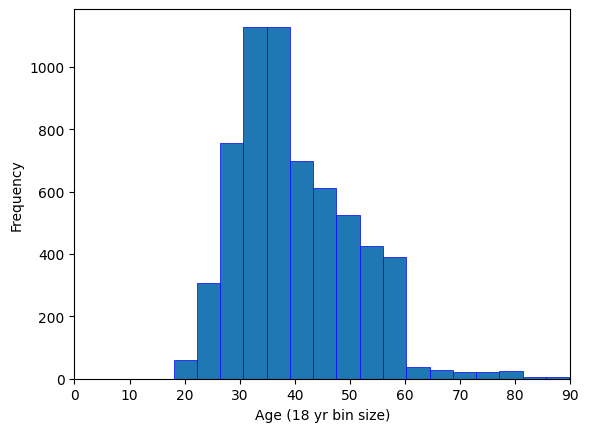

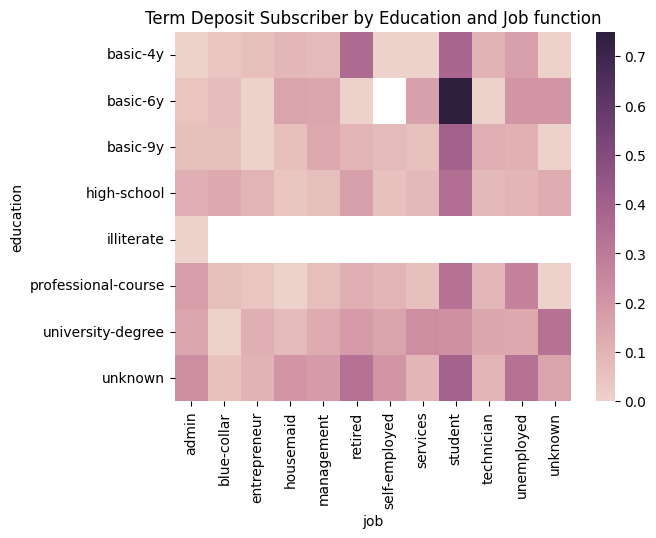

In [ ]:
import csv, random
import pandas as pd
import numpy as np
import seaborn, matplotlib.pyplot as plt

class Utility:
    """Create and initialize a class to perform repeated tasks.
    """
    def __init__(self):
        pass # Initialize the class with private and public variables.
    def random_select(self, source: str, target: str, size: float) -> str:
        """This method randomly selects percentage of data from a large set without overwhelming compute memory.
        Args:
            source (str): File name of source file.
            target (str): File name of target file.
            size (float): Size to random sample, given in decimal. 18% -> 0.18
        Returns:
            str: Target file name to be read into memory later.
        """
        with open(source, 'r') as file: # Leverage open and csv reader to parse line by line, effectively sample from large dataset.
            reader = csv.reader(file, delimiter= ';')
            header = next(reader)
            data = list(reader)
            size = round(size * len(data))
            sample_rows = random.sample(data, min(size, len(data)))
        with open(target, 'w', newline= '') as outfile:
            writer = csv.writer(outfile, delimiter= ',')
            writer.writerow(header)
            writer.writerows(sample_rows)
        return target
    def transformBinary(self, df: pd.DataFrame, columns: list) -> pd.DataFrame:
        """Leverage dictionary mapping to reformat data to binary data type to improve compute efficiency.
        Args:
            df (pd.DataFrame): Dataframe to be transformed.
            columns (list): List of columns to be transformed into binary data type.
        Returns:
            pd.DataFrame: _description_
        """
        mapping = {'yes': True, 'no': False, 'unknown': np.nan}
        for column in columns:
            df[column] = df[column].replace(mapping)
        return df
def fixCols(df: pd.DataFrame) -> pd.DataFrame:
    """Custom function to transform dataframe column 'job' and 'education' by applying mapping function to strip hidden characters and replace specific characters.
    Args:
        df (pd.DataFrame): Dataframe to be transformed.
    Returns:
        pd.DataFrame: Transformed dataframe after stripping ".,!?" and replaced "." with "-".
    """
    df['job'] = df['job'].apply(lambda val: val.rstrip(".,!?"))
    df["education"] = df["education"].apply(lambda val: val.replace('.', '-'))
    return df
def showHistogram(col: pd.Series):
    """A funtion to display a histogram of a column from the dataframe.
    Args:
        col (pd.Series): Column to be displayed.
    """
    fig, ax = plt.subplots()
    ax.hist(col, bins = 18, linewidth = 0.5, edgecolor = 'blue')
    ax.set(xlim=(0, 90), xlabel= "Age (18 yr bin size)", ylabel= "Frequency")
    plt.show()
def main():
    util = Utility()
    sample_data = util.random_select(source = 'bank-additional-full.csv', target="bank-sample.csv", size = 0.15)
    sample_data = pd.read_csv(sample_data)
    new_data = util.transformBinary(df = sample_data, columns = ['default', 'housing','loan','y'])
    new_data = fixCols(util, new_data)
    print(new_data[['age', 'duration']].describe())
    showHistogram(new_data['age'])
    pivot_table = new_data.pivot_table(values='y', index=['education'], columns=['job'], aggfunc='mean', fill_value=np.nan)
    seaborn.heatmap(pivot_table, cmap=seaborn.cubehelix_palette(as_cmap=True))
    plt.title("Term Deposit Subscriber by Education and Job function")
    plt.show()
main()